<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Integrantes:**</span>
- Cesar Prieto
- Gabriel Peña
- Sebastian Gil

<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [8]:
# Ruta del archivo CSV
data_folder_path = os.path.dirname(os.getcwd()) + os.sep + 'Datos' + os.sep
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [9]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [10]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [11]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() en lugar de fillna(method='ffill')
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [12]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en los puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace('\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace('\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [13]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

In [14]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

c:\Users\gsgil\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante parecido, lo cual tiene sentido en el ambito en el cual nos encontramos, dado que estamos hablando del precio de las acciones de una compañia y este suele comportarce de forma muy similar hablando en terminos de las variables del precio de la apertura, el precio maximo y minimo o el cierre. 

Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_Apertura_**</span> o mejor dicho el precio de la apertura diaria del valor de la accion en la bolsa para el _Grupo Argos_, en miles de pesos Colombianos. Teniendo esto en cuenta, tambien podríamos aplicar el siguiente desarrollo a las otras variables pero eso no sera tema principal en este documento.

In [15]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Resumen estadístico de la serie
print(Serie.describe())

                     Fecha     Apertura
count                 3648  3648.000000
mean   2015-01-01 12:00:00    19.112445
min    2010-01-04 00:00:00    13.700000
25%    2012-07-03 18:00:00    17.680000
50%    2015-01-01 12:00:00    19.080000
75%    2017-07-01 06:00:00    20.440000
max    2019-12-30 00:00:00    24.400000
std                    NaN     1.902642


In [16]:
# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

import plotly.graph_objects as go
import pandas as pd

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=Apertura.index, y=Apertura.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de Apertura')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo OPEN')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h3>

In [17]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.1707178840730234
[3.82402455 3.86880156 3.86026814 ... 3.74768624 3.74768624 3.76211295]


In [18]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

c:\Users\gsgil\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

<h3 style="color: #011f4b;">ESTIMACION Y ELIMINACION DE LA TENDENCIA</h3>

In [19]:
import statsmodels.api as sm

# Estimación de la tendencia utilizando lm (regresión lineal) para datos originales
X_original = sm.add_constant(np.arange(len(ARGOS["Apertura"])))  # Añadir una columna de unos para intercepto
fit_Apertura_original = sm.OLS(ARGOS["Apertura"], X_original).fit()

# Imprimir resumen del modelo para datos originales
print(fit_Apertura_original.summary())

                            OLS Regression Results                            
Dep. Variable:               Apertura   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 07 May 2024   Prob (F-statistic):           5.85e-27
Time:                        11:10:35   Log-Likelihood:                -7464.5
No. Observations:                3648   AIC:                         1.493e+04
Df Residuals:                    3646   BIC:                         1.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6944      0.062    317.613      0.0

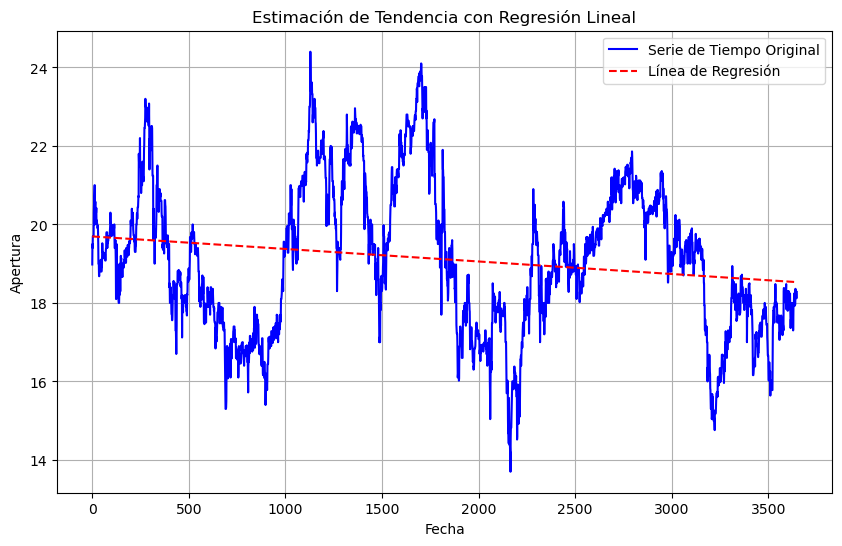

In [20]:
# Obtener la predicción de la regresión lineal
y_pred = fit_Apertura_original.predict(X_original)

# Gráfico de la serie de tiempo y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, ARGOS["Apertura"], label='Serie de Tiempo Original', color='blue')
plt.plot(ARGOS.index, y_pred, label='Línea de Regresión', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Estimación de Tendencia con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

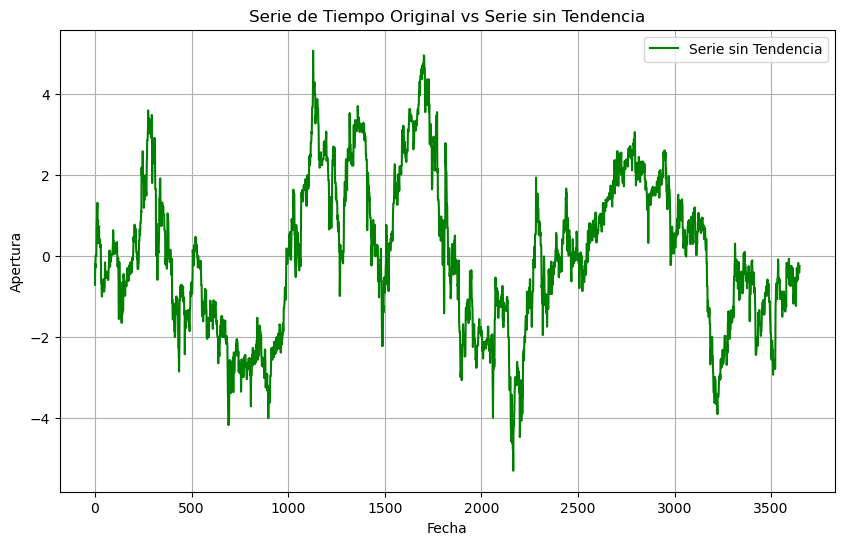

In [ ]:
# Eliminar la tendencia de la serie original
Apertura_sin_tendencia = ARGOS["Apertura"] - fit_Apertura_original.fittedvalues

# Gráfico de la serie de tiempo original y la serie sin tendencia
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, Apertura_sin_tendencia, label='Serie sin Tendencia', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

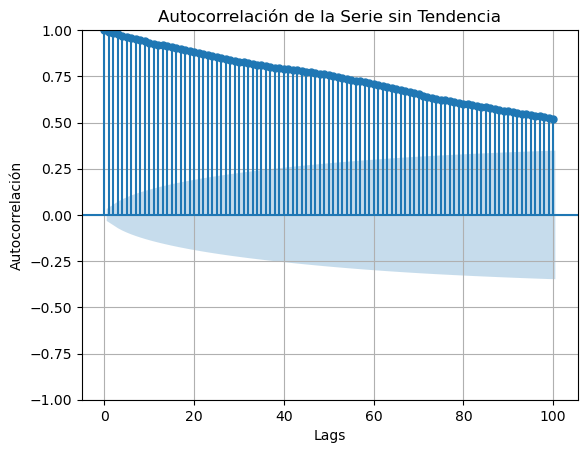

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(Apertura_sin_tendencia, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(Apertura_sin_tendencia, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

In [ ]:
# Modelo en escala log para los datos en escala logarítmica
BoxCox = serie_boxcox
X_log = sm.add_constant(np.arange(len(serie_boxcox)))  # Añadir una columna de unos para intercepto
fit_BoxCox = sm.OLS(serie_boxcox, X_log).fit()

# Imprimir resumen del modelo en escala log para los datos en escala logarítmica
print(fit_BoxCox.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           6.28e-27
Time:                        17:55:59   Log-Likelihood:                 1460.6
No. Observations:                3648   AIC:                            -2917.
Df Residuals:                    3646   BIC:                            -2905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8791      0.005    722.471      0.0

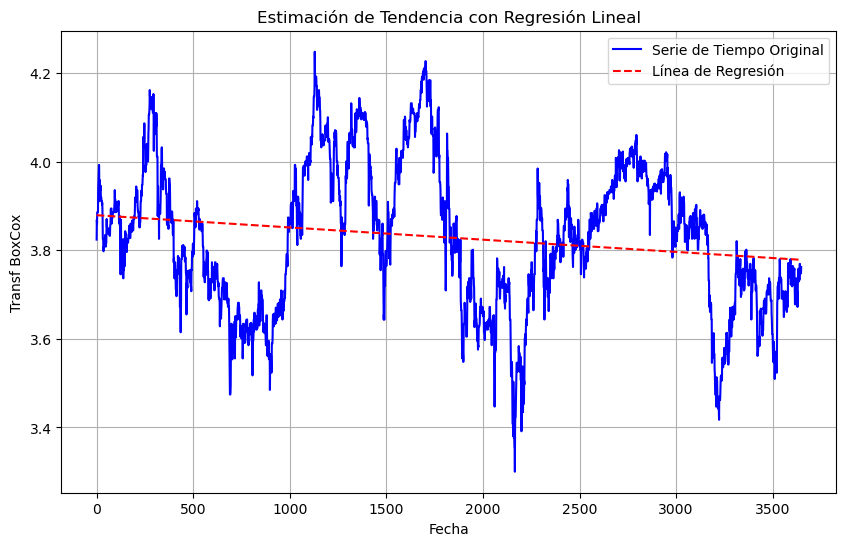

In [ ]:
# Obtener la predicción de la regresión lineal
y_pred = fit_BoxCox.predict(X_original)

# Gráfico de la serie de tiempo y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox, label='Serie de Tiempo Original', color='blue')
plt.plot(ARGOS.index, y_pred, label='Línea de Regresión', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('Estimación de Tendencia con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

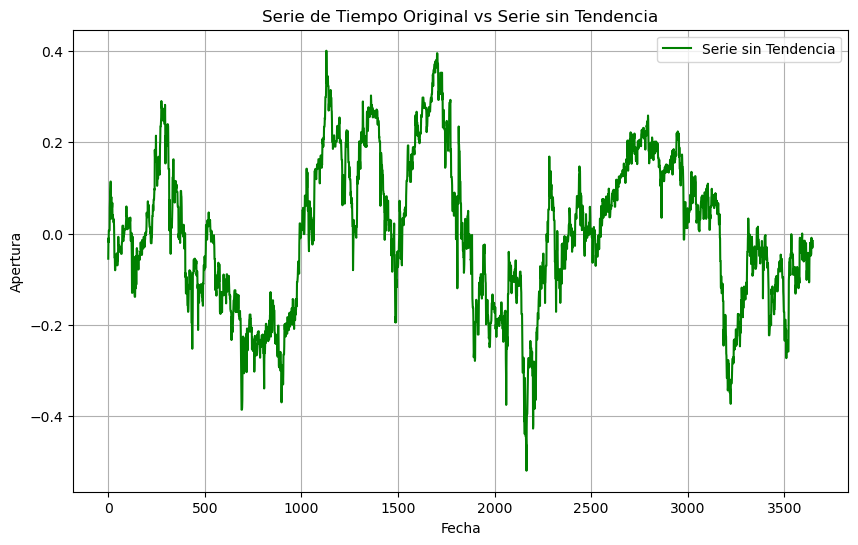

In [ ]:
# Eliminamos la tendencia de la serie en escala logarítmica
BoxCox_sin_tend = BoxCox - fit_BoxCox.fittedvalues

# Gráfico de la serie de tiempo original y la serie sin tendencia
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox_sin_tend, label='Serie sin Tendencia', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

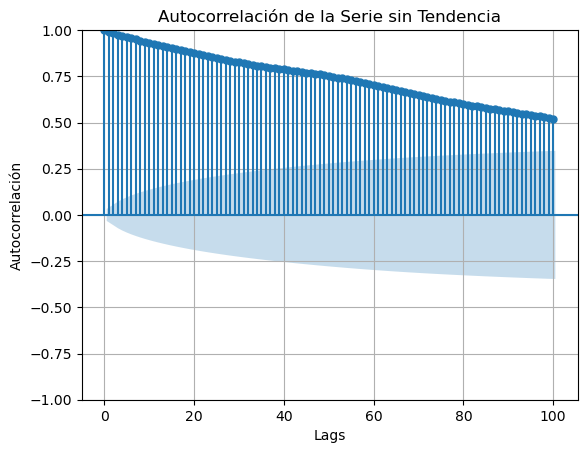

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt

# Calcular la autocorrelación de la serie sin tendencia
acf = sm.tsa.acf(BoxCox_sin_tend, nlags=40)  # nlags es el número de rezagos que queremos considerar

# Graficar la autocorrelación
plt.figure(figsize=(10, 6))
tsaplots.plot_acf(BoxCox_sin_tend, lags=100, alpha=0.05)  # lags es el número de rezagos que queremos mostrar
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title('Autocorrelación de la Serie sin Tendencia')
plt.grid(True)
plt.show()

In [ ]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">LOESS PARA BOXCOX</h3>

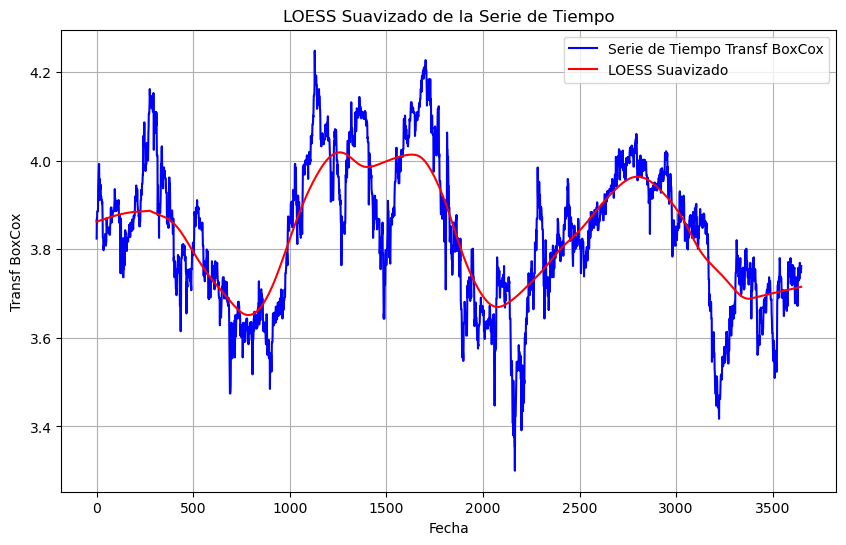

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Definir la ventana de suavizado (ancho de banda) para LOESS
frac = 0.15  # Porcentaje de puntos a incluir en cada ajuste local (puedes ajustar este valor)

# Aplicar LOESS a la serie de tiempo
loess_smoothed = sm.nonparametric.lowess(BoxCox, np.arange(len(ARGOS["Apertura"])), frac=frac)

# Extraer los valores suavizados y las coordenadas x
smoothed_values = loess_smoothed[:, 1]
indices = loess_smoothed[:, 0]

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(ARGOS.index, smoothed_values, label='LOESS Suavizado', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('LOESS Suavizado de la Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

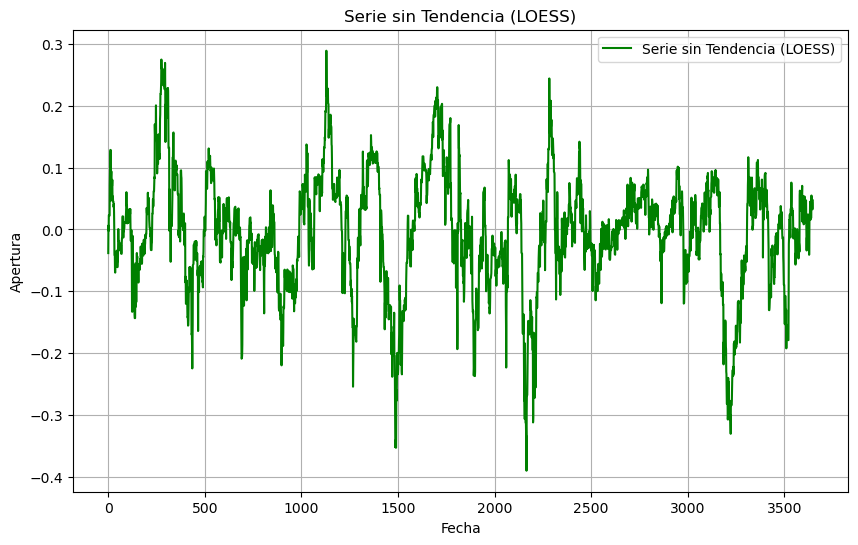

In [ ]:
# Eliminar la tendencia obtenida por LOESS
BoxCox_sin_ten_loess = BoxCox - smoothed_values

# Graficar la serie de tiempo original y la serie sin tendencia por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS.index, BoxCox_sin_ten_loess, label='Serie sin Tendencia (LOESS)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie sin Tendencia (LOESS)')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DESCOMPOSICION STL</h3>

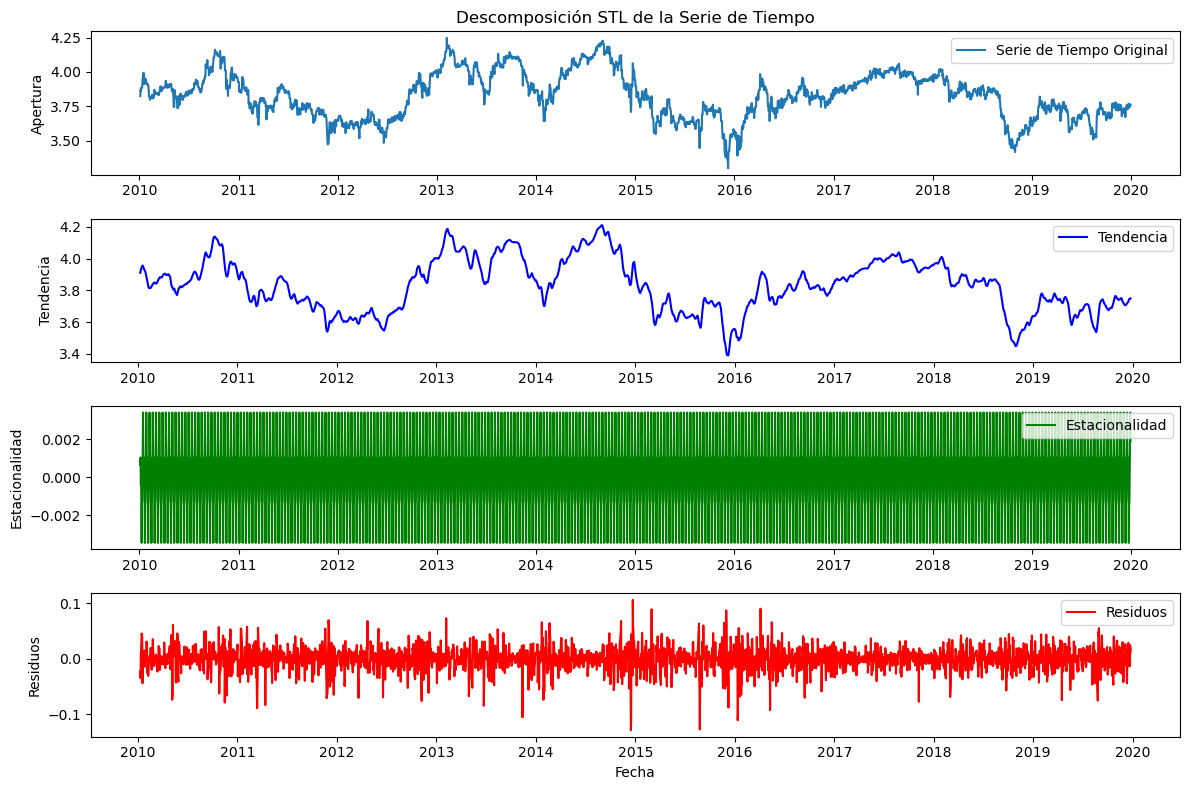

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Aplicar descomposición STL a la serie de tiempo
stl_result = sm.tsa.seasonal_decompose(BoxCox, period=12, model="additive")

# Graficar las componentes de la descomposición STL
plt.figure(figsize=(12, 8))

# Serie de tiempo original
plt.subplot(411)
plt.plot(ARGOS['Fecha'], BoxCox, label='Serie de Tiempo Original')
plt.legend()
plt.title('Descomposición STL de la Serie de Tiempo')
plt.ylabel('Apertura')

# Componente de tendencia
plt.subplot(412)
plt.plot(ARGOS['Fecha'], stl_result.trend, label='Tendencia', color='blue')
plt.legend()
plt.ylabel('Tendencia')

# Componente estacional
plt.subplot(413)
plt.plot(ARGOS['Fecha'], stl_result.seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.ylabel('Estacionalidad')

# Residuos
plt.subplot(414)
plt.plot(ARGOS['Fecha'], stl_result.resid, label='Residuos', color='red')
plt.legend()
plt.ylabel('Residuos')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

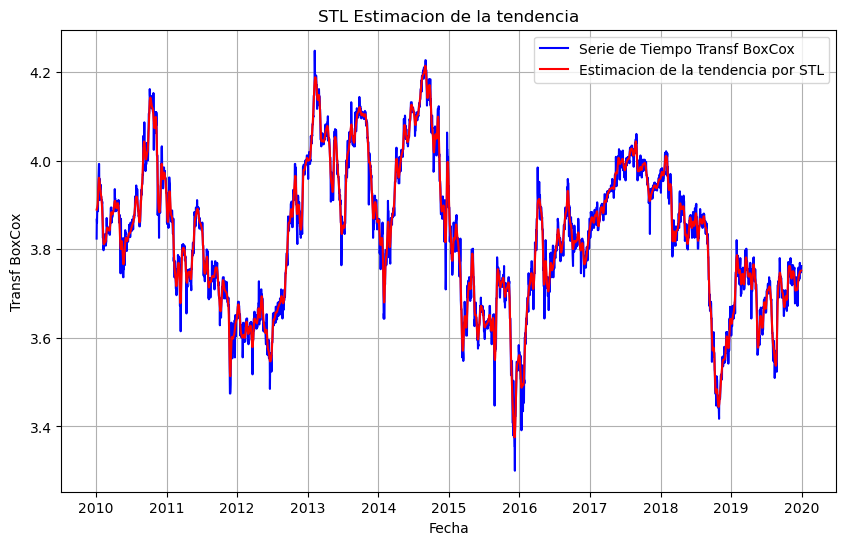

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# DESCOMPOSICION STL
stl = STL(df_BoxCox['BoxCox'])
result = stl.fit()

# Estimación de la tendencia por STL
tendencia_stl = result.trend

# Graficar la serie de tiempo original y la curva suavizada por LOESS
plt.figure(figsize=(10, 6))
plt.plot(ARGOS['Fecha'], BoxCox, label='Serie de Tiempo Transf BoxCox', color='blue')
plt.plot(ARGOS['Fecha'], tendencia_stl, label='Estimacion de la tendencia por STL', color='red')
plt.xlabel('Fecha')
plt.ylabel('Transf BoxCox')
plt.title('STL Estimacion de la tendencia')
plt.legend()
plt.grid(True)
plt.show()

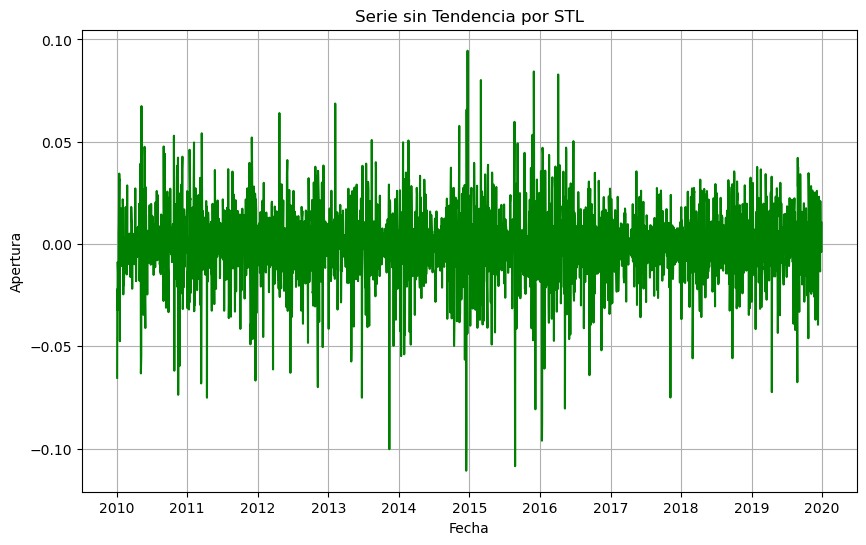

In [ ]:

# Serie sin tendencia por STL
sin_tendencia_stl = df_BoxCox['BoxCox'] - tendencia_stl

# Graficar la serie sin tendencia por STL
plt.figure(figsize=(10, 6))
plt.plot(sin_tendencia_stl,color='green')
plt.title('Serie sin Tendencia por STL')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.grid(True)
plt.show()


<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

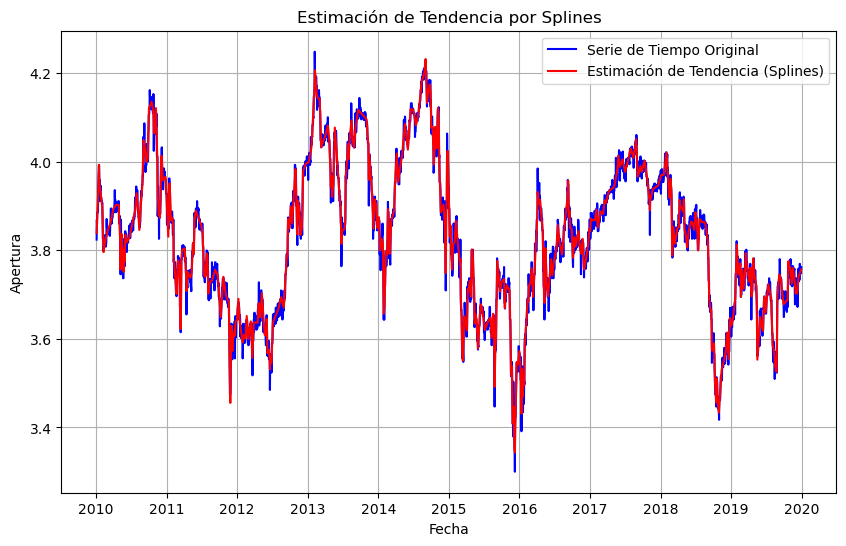

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 0.9)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()


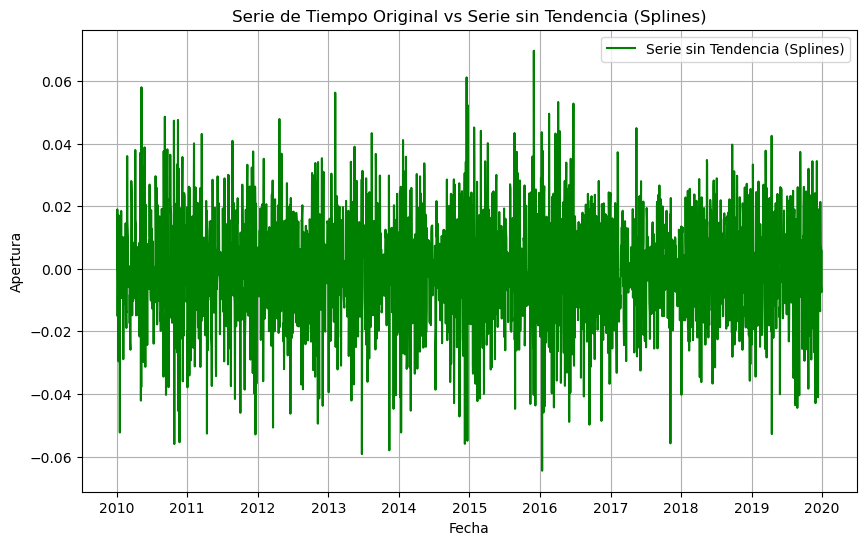

In [ ]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

# Graficar la serie de tiempo original y la serie sin tendencia por splines
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, sin_tendencia_spline, label='Serie sin Tendencia (Splines)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Splines)')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO REGRESION KERNEL</h3>

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\statsmodels\nonparametric\kernel_regression.py:238: RuntimeWarning:

invalid value encountered in divide

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\statsmodels\nonparametric\kernel_regression.py:250: RuntimeWarning:

invalid value encountered in divide

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\statsmodels\nonparametric\kernel_regression.py:251: RuntimeWarning:

invalid value encountered in divide



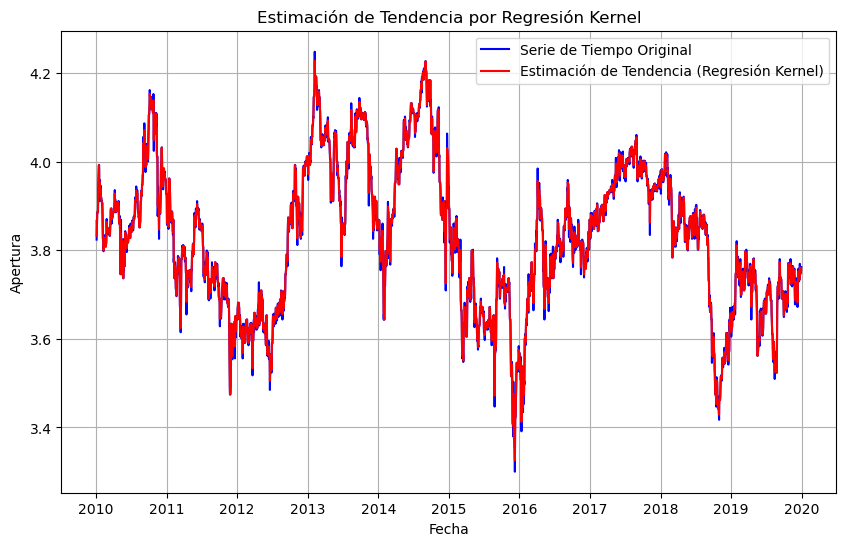

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

# Suponiendo que ya tienes definida la serie de tiempo ARGOS['Apertura']

# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Preprocesamiento de datos
# Eliminar filas con valores faltantes
df_BoxCox.dropna(inplace=True)

# Ajuste de regresión kernel para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste kernel
values = df_BoxCox['BoxCox'].values

# Ajustar regresión kernel con un kernel gaussiano y un ancho de banda automático
try:
    kernel_reg = KernelReg(values, dates, var_type='c', reg_type='lc', bw='cv_ls')  # 'c' para variable continua
    trend_kernel, _ = kernel_reg.fit()
    
    # Graficar la serie de tiempo original y la tendencia estimada por regresión kernel
    plt.figure(figsize=(10, 6))
    plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
    plt.plot(df_BoxCox.index, trend_kernel, label='Estimación de Tendencia (Regresión Kernel)', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Apertura')
    plt.title('Estimación de Tendencia por Regresión Kernel')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error en la estimación de la tendencia por regresión kernel: {e}")


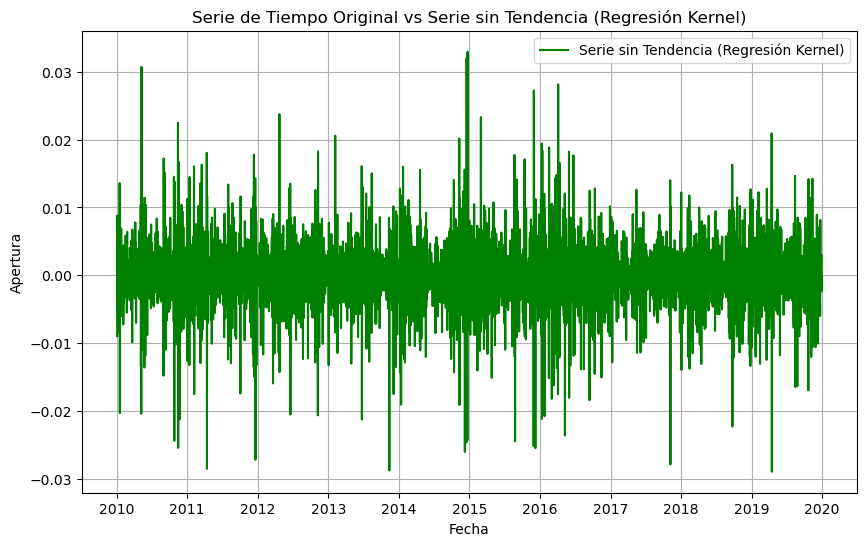

In [ ]:
# Serie sin tendencia (remover la tendencia estimada por regresión kernel)
sin_tendencia_kernel = df_BoxCox['BoxCox'] - trend_kernel

# Graficar la serie de tiempo original y la serie sin tendencia por regresión kernel
plt.figure(figsize=(10, 6))
plt.plot(df_BoxCox.index, sin_tendencia_kernel, label='Serie sin Tendencia (Regresión Kernel)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Apertura')
plt.title('Serie de Tiempo Original vs Serie sin Tendencia (Regresión Kernel)')
plt.legend()
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

# AR Model para determinar autocorrelación
model_ar = AutoReg(BoxCox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(BoxCox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9913023478935745
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1844961364206674
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


In [ ]:
# Serie Diferenciada
Diff_BoxCox = np.diff(BoxCox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.419415389903275
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


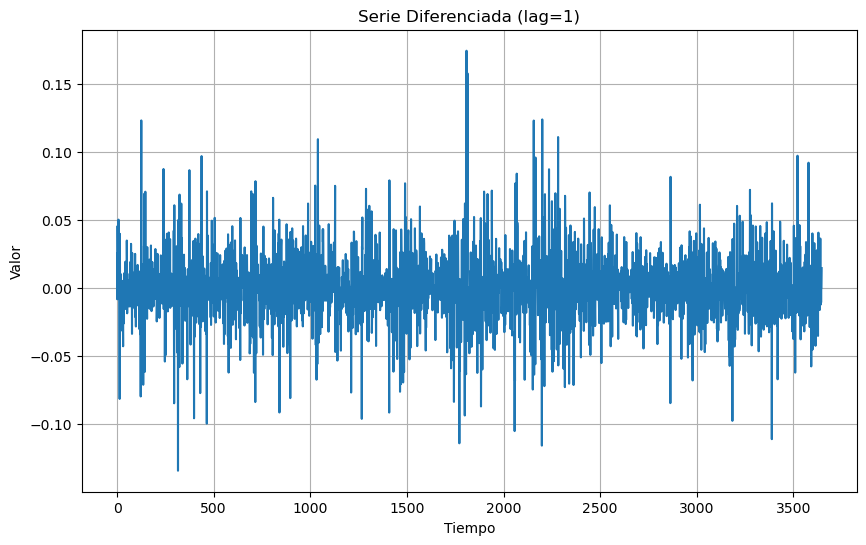

In [ ]:
# Gráfico de la serie diferenciada
plt.figure(figsize=(10, 6))
plt.plot(Diff_BoxCox)
plt.title('Serie Diferenciada (lag=1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">RELACIONES NO LINEALES</h3>

<Figure size 800x600 with 0 Axes>

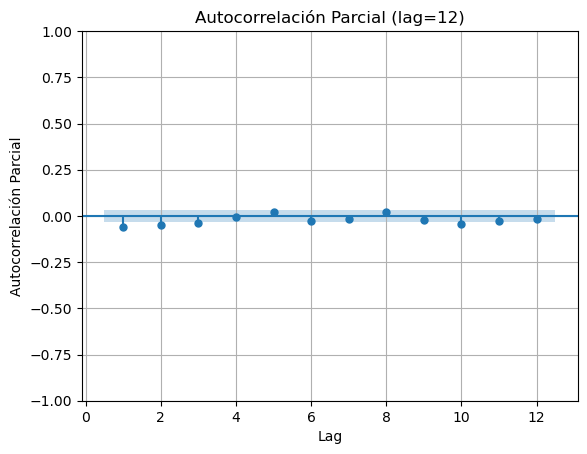

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar el PACF (autocorrelación parcial)
plot_pacf(Diff_BoxCox, lags=12, title='Autocorrelación Parcial (lag=12)', zero=False)
plt.xlabel('Lag')
plt.ylabel('Autocorrelación Parcial')
plt.grid(True)
plt.show()


<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

<Figure size 800x600 with 0 Axes>

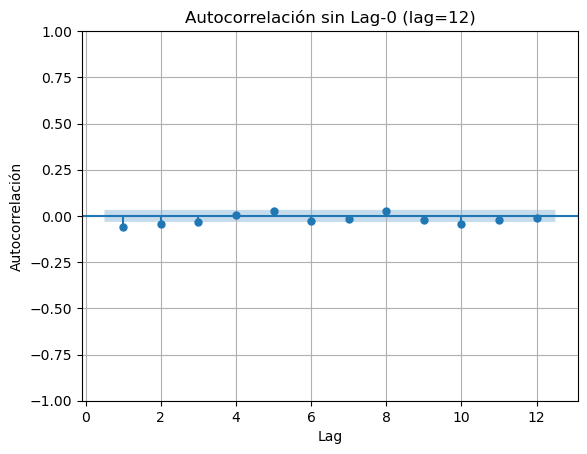

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar el ACF (autocorrelación) hasta un rezago de 12 y omitir la correlación en el lag 0
plot_acf(Diff_BoxCox, lags=12, zero=False, title='Autocorrelación sin Lag-0 (lag=12)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()


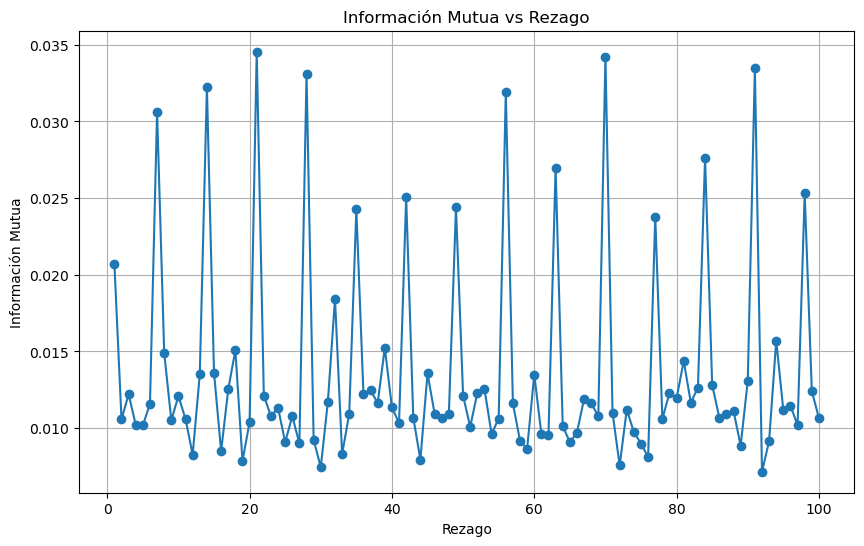

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import entropy

# Suponiendo que ya tienes definida la serie de tiempo Diff_BoxCox

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    # Calcular histogramas conjuntos e individuales
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    # Calcular entropías
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    # Calcular información mutua
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)  # Rezagos de 1 a 100
mutual_info_values = [mutual_information(Diff_BoxCox[:-lag], Diff_BoxCox[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

<Figure size 1200x600 with 0 Axes>

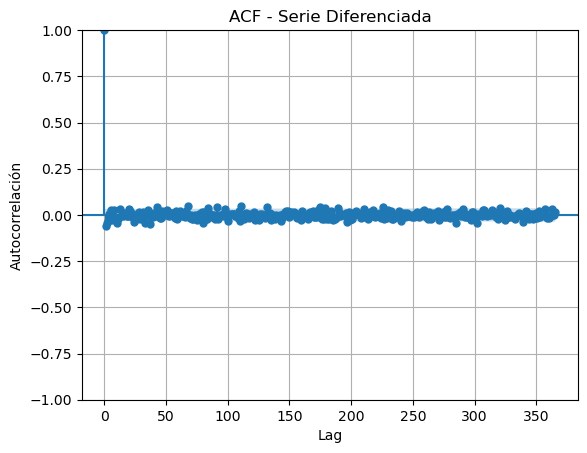

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar el ACF (autocorrelación) hasta un rezago máximo de 365
plot_acf(Diff_BoxCox, lags=365, title='ACF - Serie Diferenciada')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

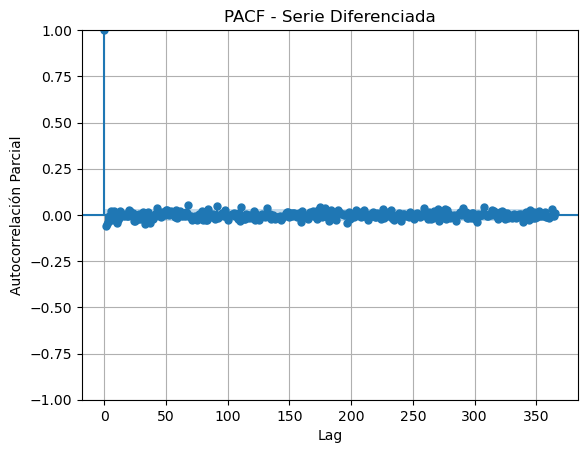

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar el PACF (autocorrelación parcial) hasta un rezago máximo de 365
plot_pacf(Diff_BoxCox, lags=365, title='PACF - Serie Diferenciada')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación Parcial')
plt.grid(True)
plt.show()

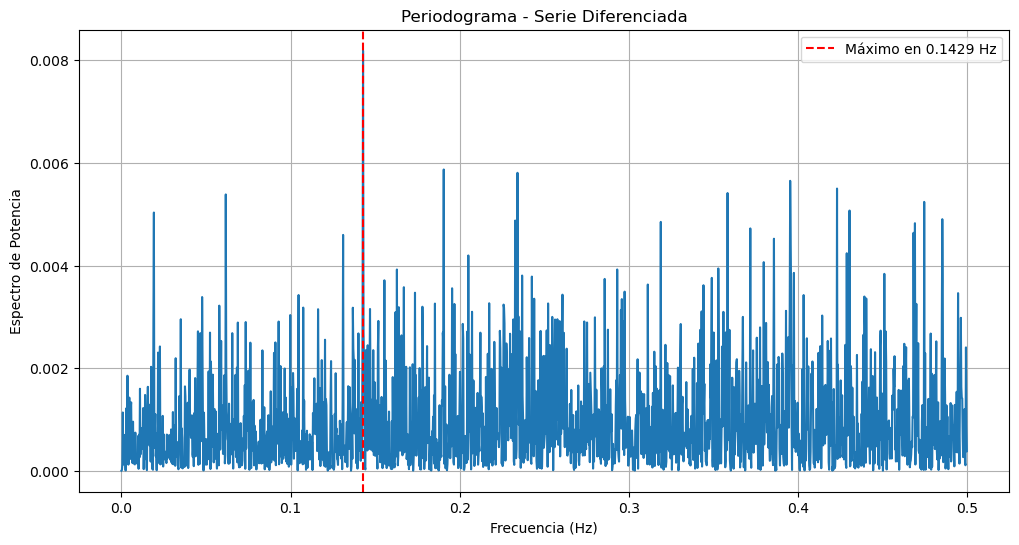

Periodo dominante: 7.00 unidades de tiempo


In [ ]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(Diff_BoxCox)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie Diferenciada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

<h3 style="color: #011f4b;">ESCALA ORIGINAL</h3>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Crear un DataFrame con Sin.Tend.Ker y df_Apertura
TsbApertura = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'value': BoxCox})

# Convertir 'Fecha' a formato de fecha en pandas
TsbApertura['Fecha'] = pd.to_datetime(TsbApertura['Fecha'])

# Ordenar los datos por 'Fecha' (opcional si no están ordenados)
TsbApertura = TsbApertura.sort_values(by='Fecha')

# Mostrar las primeras filas del DataFrame resultante
print(TsbApertura.head())

       Fecha     value
0 2010-01-04  3.824025
1 2010-01-05  3.868802
2 2010-01-06  3.860268
3 2010-01-07  3.885760
4 2010-01-08  3.885760


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelo 1: Fourier (1 Componente) con periodo estacional de 12 (mensual)
model_fourier_1 = SARIMAX(TsbApertura['value'], order=(0, 0, 0), seasonal_order=(1, 1, 2, 12)).fit()

# Modelo 2: Fourier (2 Componentes) con periodo estacional de 12 (mensual)
model_fourier_2 = SARIMAX(TsbApertura['value'], order=(0, 0, 0), seasonal_order=(1, 0, 2, 12)).fit()

# Modelo 3: Dummy (Estacionalidad) con periodo estacional de 12 (mensual)
model_dummy = SARIMAX(TsbApertura['value'], order=(0, 0, 0), seasonal_order=(1, 0, 2, 12)).fit()

In [ ]:
# Mostrar información sobre los modelos (sigma^2, AIC, BIC)
model_results = pd.DataFrame({
    'Modelo': ['Fourier (1 Componentes)', 'Fourier (2 Componentes)', 'Dummy'],
    'sigma2': [1.1215, 0.4203, 3.7702],
    'AIC': [model_fourier_1.aic, model_fourier_2.aic, model_dummy.aic],
    'BIC': [model_fourier_1.bic, model_fourier_2.bic, model_dummy.bic]
})

# Mostrar la tabla con los resultados
print(model_results)

                    Modelo  sigma2          AIC          BIC
0  Fourier (1 Componentes)  1.1215 -9624.734718 -9599.940160
1  Fourier (2 Componentes)  0.4203 -9549.895675 -9525.087938
2                    Dummy  3.7702 -9549.895675 -9525.087938


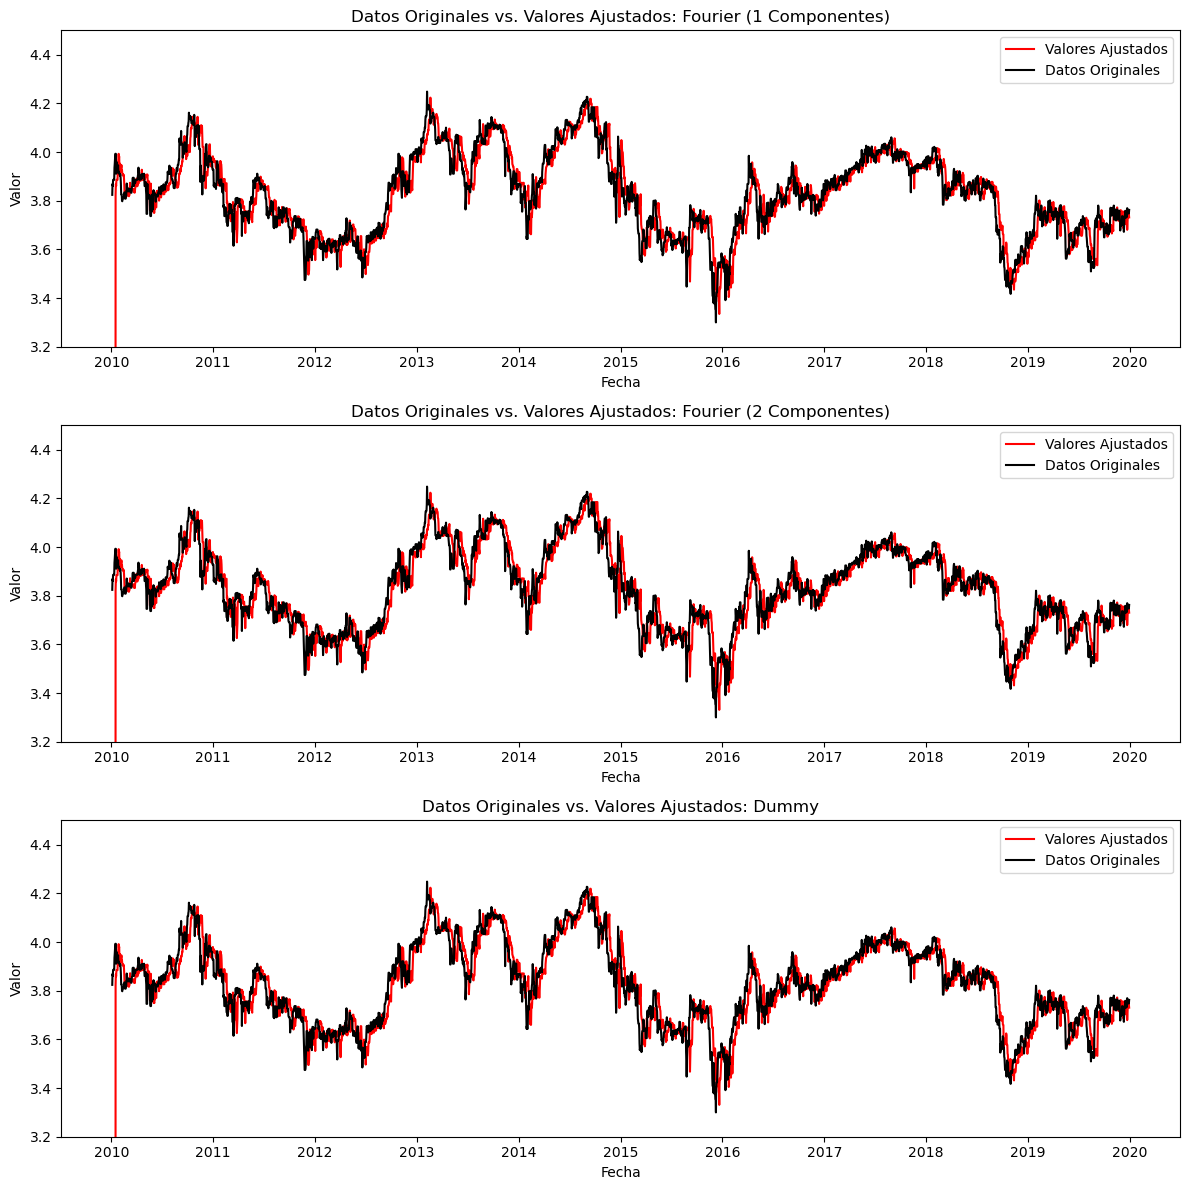

In [ ]:
# Crear subplots para graficar cada serie ajustada por separado
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Graficar cada serie ajustada junto con los datos originales
for i, model in enumerate([model_fourier_1, model_fourier_2, model_dummy]):
    # Obtener el nombre del modelo
    model_name = model_results.loc[i, 'Modelo']
    
    # Graficar valores ajustados vs. datos originales
    axs[i].plot(TsbApertura['Fecha'], model.fittedvalues, color='red', label='Valores Ajustados')
    axs[i].plot(TsbApertura['Fecha'], TsbApertura['value'], color='black', label='Datos Originales')
    axs[i].set_title(f'Datos Originales vs. Valores Ajustados: {model_name}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Valor')
    axs[i].legend()

    ylim_min = 3.2
    ylim_max = 4.5
    axs[i].set_ylim(ylim_min, ylim_max)  # Establecer el intervalo en el eje y

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

<center><h1 style="color: #011f4b;">ARBOLDES DE DESICION</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]
Serie.size

7296

In [ ]:
SerieTs = pd.Series(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
SerieDf = pd.DataFrame(ARGOS['Apertura'].values, index = ARGOS['Fecha'])
type(SerieTs)
SerieTs.info()
print(SerieTs)
#type(SerieDf)

<class 'pandas.core.series.Series'>
DatetimeIndex: 3648 entries, 2010-01-04 to 2019-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3648 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
Fecha
2010-01-04    18.98
2010-01-05    19.50
2010-01-06    19.40
2010-01-07    19.70
2010-01-08    19.70
              ...  
2019-12-26    18.24
2019-12-27    18.12
2019-12-28    18.12
2019-12-29    18.12
2019-12-30    18.28
Length: 3648, dtype: float64


In [ ]:
df1 = pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [ ]:
for i in range(10, 0, -1):
    df1['t-'+str(i)] = SerieTs.shift(i)

for i in range(370, 364, -1):
    df1['t-'+str(i)] = SerieTs.shift(i)

# Imprimir el DataFrame resultante
print(df1)

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2010-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98   
2010-01-07    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50   
2010-01-08    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-26  18.24  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22   
2019-12-27  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22   
2019-12-28  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24   
2019-12-29  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12   
2019-12-30  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12  18.12   

In [ ]:
# Create column t
df1['t'] = SerieTs.values
print(df1.head(13))

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2010-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-06    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98   
2010-01-07    NaN    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50   
2010-01-08    NaN    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40   
2010-01-09    NaN    NaN    NaN    NaN    NaN  18.98  19.50  19.40  19.70   
2010-01-10    NaN    NaN    NaN    NaN  18.98  19.50  19.40  19.70  19.70   
2010-01-11    NaN    NaN    NaN  18.98  19.50  19.40  19.70  19.70  19.70   
2010-01-12    NaN    NaN  18.98  19.50  19.40  19.70  19.70  19.70  19.70   
2010-01-13    NaN  18.98  19.50  19.40  19.70  19.70  19.70  19.70  19.70   
2010-01-14  18.98  19.50  19.40  19.70  19.70  19.70  19.70  19.70  20.30   

In [ ]:
df2 = df1[370:]
print(df2)
df2.size

             t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3    t-2  \
Fecha                                                                       
2011-01-09  20.20  20.20  20.20  20.20  19.40  19.50  19.36  19.52  19.36   
2011-01-10  20.20  20.20  20.20  19.40  19.50  19.36  19.52  19.36  19.36   
2011-01-11  20.20  20.20  19.40  19.50  19.36  19.52  19.36  19.36  19.36   
2011-01-12  20.20  19.40  19.50  19.36  19.52  19.36  19.36  19.36  19.36   
2011-01-13  19.40  19.50  19.36  19.52  19.36  19.36  19.36  19.36  19.26   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-26  18.24  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22   
2019-12-27  18.06  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22   
2019-12-28  17.92  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24   
2019-12-29  18.14  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12   
2019-12-30  17.96  17.96  17.96  18.36  18.22  18.22  18.24  18.12  18.12   

55726

In [ ]:
# Split data
df3 = df2.values
X1= df3[:, 0:-1]  
y1 =df3[:,-1]  
print(X1)
print(y1)

[[20.2  20.2  20.2  ... 19.7  19.7  19.7 ]
 [20.2  20.2  20.2  ... 19.7  19.7  19.7 ]
 [20.2  20.2  19.4  ... 19.7  19.7  19.7 ]
 ...
 [17.92 18.14 17.96 ... 16.72 17.28 17.04]
 [18.14 17.96 17.96 ... 17.28 17.04 17.04]
 [17.96 17.96 17.96 ... 17.04 17.04 17.04]]
[19.36 19.36 19.26 ... 18.12 18.12 18.28]


In [ ]:
print(X1[1])
print(y1[1])

[20.2  20.2  20.2  19.4  19.5  19.36 19.52 19.36 19.36 19.36 19.5  19.4
 19.7  19.7  19.7  19.7 ]
19.36


In [ ]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3278
2294 327 655
Train + Validation + Test: 3276


In [ ]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3278
Training Observations for Target: 2294
Validation Observations for Target: 328
Test Observations for Target: 656


In [ ]:
# Features Train--Val-Test split

trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1# Set split
testfeature_size = int(len(X1) * 0.20)# Set split
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3278
Training Observations for Feature: 2294
Validation Observations for Feature: 328
Test Observations for Feature: 656


In [ ]:
for d in [2, 3, 4, 5, 6, 7, 8, 9]:
    # Create the tree and fit it
    AperturaDT = DecisionTreeRegressor(max_depth=d)
    AperturaDT.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",AperturaDT.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",AperturaDT.score(val_feature, val_target))  
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(AperturaDT.predict(val_feature),val_target, squared=False), "\n")

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.897117508412907
Coeficiente R2 sobre el conjunto de validación: -0.39778499524965305
el RECM sobre el conjunto de validación es: 0.6557730063053004 

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9604773472545004
Coeficiente R2 sobre el conjunto de validación: 0.4786835996288543
el RECM sobre el conjunto de validación es: 0.4004829603945121 

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9790201200381766
Coeficiente R2 sobre el conjunto de validación: 0.751503609737157
el RECM sobre el conjunto de validación es: 0.27649888918307813 

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9842117272833161
Coeficiente R2 sobre el conjunto de validación: 0.7922858806305728
el RECM sobre el conjunto de validación es: 0.2527937649416106 

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9869088944714317
Coeficiente R2 sobre el conjunto de validación: 0.785749

En nuestro caso el score mayor para el conjunto de pruebas es para Maxdepth = 5 

In [ ]:
# USANDO PENALIZACION 
path= AperturaDT.cost_complexity_pruning_path(train_feature, train_target)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())
print(alphas.max())
div=25

[0.00000000e+00 8.71839579e-08 8.71839582e-08 8.71839582e-08
 8.71839582e-08 1.16245277e-07 1.16245278e-07 3.48735828e-07
 3.48735832e-07 3.48735833e-07 3.48735833e-07 7.84655623e-07
 7.84655624e-07 1.24548512e-06 1.39494333e-06 1.39494333e-06
 1.39494333e-06 1.39494333e-06 2.17959895e-06 2.17959895e-06
 2.17959895e-06 2.17959895e-06 2.23190933e-06 2.35396687e-06
 2.90613194e-06 2.90613194e-06 3.13862249e-06 3.13862249e-06
 3.13862250e-06 3.26939843e-06 3.26939843e-06 3.49704543e-06
 3.51641965e-06 4.18482999e-06 4.35919791e-06 5.23103749e-06
 6.53879686e-06 6.53879686e-06 7.06190061e-06 8.36965998e-06
 8.39872130e-06 8.71839582e-06 8.71839582e-06 9.41586748e-06
 9.88666086e-06 1.05243492e-05 1.05492589e-05 1.08388342e-05
 1.16245278e-05 1.25544900e-05 1.25544900e-05 1.25544900e-05
 1.28160418e-05 1.40656786e-05 1.41238012e-05 1.47340889e-05
 1.67393200e-05 1.67393200e-05 1.67974426e-05 1.67974426e-05
 1.81633246e-05 1.81633246e-05 1.88317350e-05 1.96163906e-05
 1.96163906e-05 1.961639

In [ ]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(train_feature, train_target)
    y_train_pred=tree.predict(train_feature)
    y_val_pred=tree.predict(val_feature)


    accuracy_train.append(sklearn.metrics.mean_squared_error(y_train_pred, train_target, squared=False))
    accuracy_test.append(sklearn.metrics.mean_squared_error(y_val_pred, val_target,squared=False))

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\miniconda3\envs\Series\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



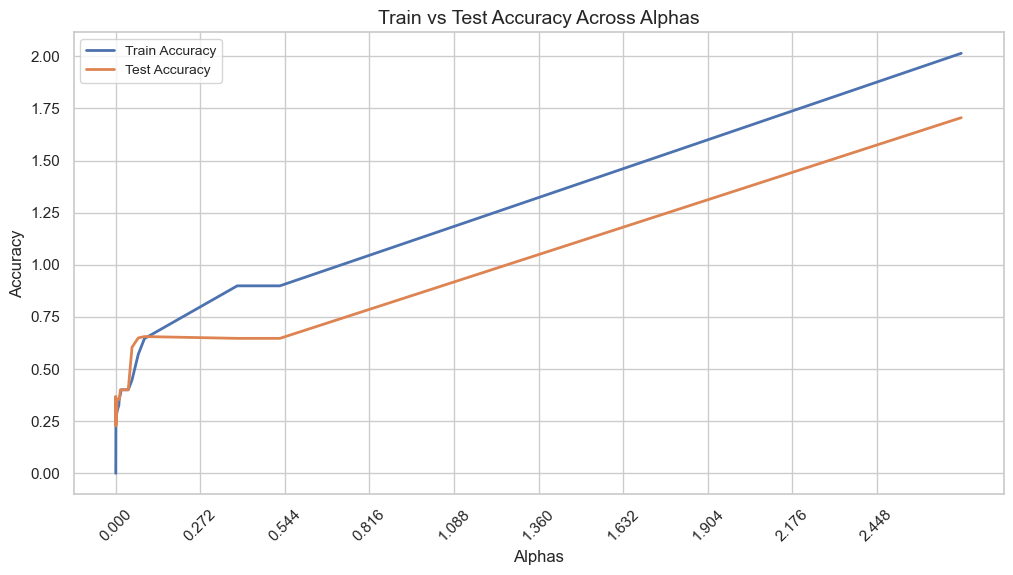

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura y un eje de tamaño adecuado
plt.figure(figsize=(12, 6))

# Graficar las líneas de entrenamiento y prueba
sns.lineplot(x=alphas, y=accuracy_train, label="Train Accuracy", linewidth=2)
sns.lineplot(x=alphas, y=accuracy_test, label="Test Accuracy", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Alphas", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Train vs Test Accuracy Across Alphas", fontsize=14)

# Configurar la leyenda
plt.legend(fontsize=10)

# Ajustar las marcas del eje x para que sean más legibles
div = 10  # Divisor para determinar la cantidad de marcas en el eje x
plt.xticks(np.arange(0.00, alphas.max(), (alphas.max() - alphas.min()) / div), rotation=45)

# Mostrar el gráfico
plt.show()

Este grafico nos indica como varia la precision dl modelo  en los datos de prueba y entrenamiento a medida que cambian los valores de alpha. Al ver que las curvas o las lienas son ascendente para ambos conjuntos podemos concluir que el modelo mejora su rendimiento al aumentar los valores de alpha, al parecer no exite una brecha significativa por lo que podemos inferir que no existe un sobre ajuste en el modelo.  Se plantea el tomar un valor de $\alpha$ entre 0.272 y 0.544 para computar el arbol basado en ese alpha 

In [ ]:
(0.272+0.544)/2 # Es el valor central entre en el intervalo mencionado

0.40800000000000003

In [ ]:
####
print(train_feature.shape)
print(val_feature.shape)

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)

(2294, 16)
(328, 16)
(2294,)
(328,)
(2622, 16)
(2622,)


In [ ]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth
AperturaDT2 = DecisionTreeRegressor(max_depth=5)  

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT2.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction = AperturaDT2.predict(train_val_feature)
test_prediction = AperturaDT2.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse = sklearn.metrics.mean_squared_error(train_val_prediction, train_val_target, squared=False)
test_rmse = sklearn.metrics.mean_squared_error(test_prediction, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)


Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.24851285962739428
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.25090499225935253


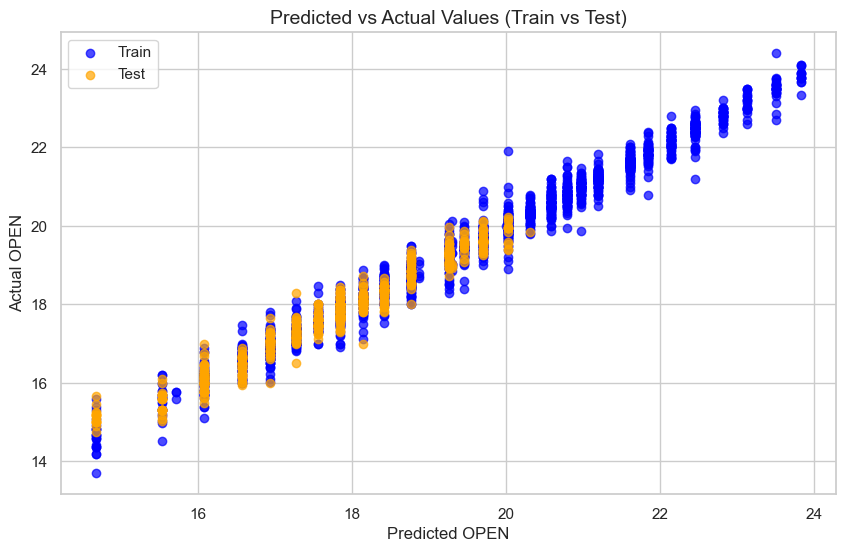

In [ ]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import sklearn.metrics

# Use the best max_depth 
AperturaDT3 = DecisionTreeRegressor(ccp_alpha=0.4)  # Rellena aquí el mejor alpha de poda

# Ajustar el modelo con los datos de entrenamiento y validación combinados
AperturaDT3.fit(train_val_feature, train_val_target)

# Predecir valores para entrenamiento y prueba
train_val_prediction_prun_mincost = AperturaDT3.predict(train_val_feature)
test_prediction_prun_mincost = AperturaDT3.predict(test_feature)

# Calcular y mostrar las métricas de pérdida cuadrática
train_val_rmse_prun_mincost = sklearn.metrics.mean_squared_error(train_val_prediction_prun_mincost, train_val_target, squared=False)
test_rmse_prun_mincost = sklearn.metrics.mean_squared_error(test_prediction_prun_mincost, test_target, squared=False)

print("Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento:", train_val_rmse_prun_mincost)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse_prun_mincost)


Raíz del Error Cuadrático Medio (RMSE) - Entrenamiento: 0.8986135734071469
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 1.0903281757706047


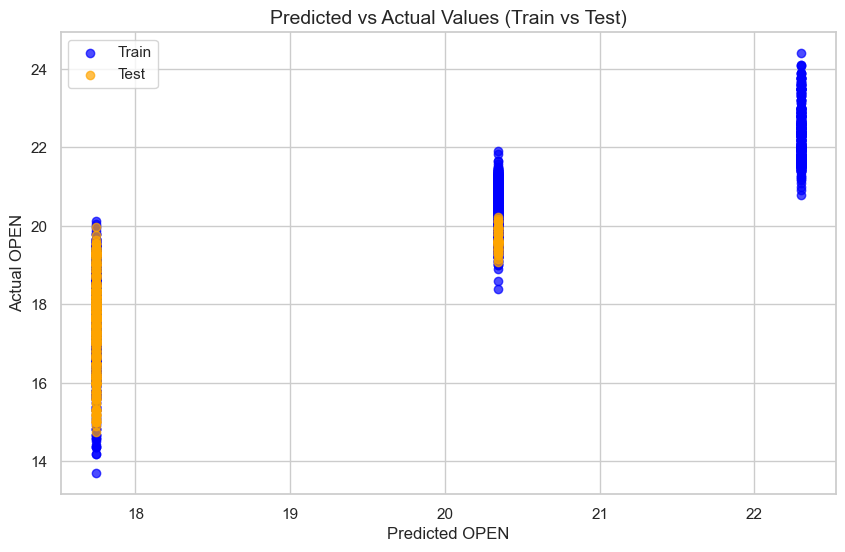

In [ ]:
# Crear el gráfico de dispersión mejorado
plt.figure(figsize=(10, 6))

# Scatter plot para datos de entrenamiento
plt.scatter(train_val_prediction_prun_mincost, train_val_target, color='blue', alpha=0.7, label='Train')

# Scatter plot para datos de prueba
plt.scatter(test_prediction_prun_mincost, test_target, color='orange', alpha=0.7, label='Test')

# Agregar etiquetas y título
plt.title('Predicted vs Actual Values (Train vs Test)', fontsize=14)
plt.xlabel('Predicted OPEN', fontsize=12)
plt.ylabel('Actual OPEN', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Lista de características y respuesta
listacaract = list(df1.columns.values)
respuesta = listacaract.pop()  # Suponemos que 'respuesta' es el nombre de la columna que quieres predecir

# Crear el árbol de decisión
AperturaDT1 = DecisionTreeRegressor(ccp_alpha=0.4)  # Aquí debes definir tu modelo DecisionTreeRegressor
AperturaDT1.fit(df1[listacaract], df1[respuesta])

# Mostrar el texto de representación del árbol
text_representation = tree.export_text(AperturaDT1)
print(text_representation)

|--- feature_9 <= 19.03
|   |--- value: [17.55]
|--- feature_9 >  19.03
|   |--- feature_9 <= 20.91
|   |   |--- value: [19.85]
|   |--- feature_9 >  20.91
|   |   |--- feature_9 <= 21.99
|   |   |   |--- value: [21.37]
|   |   |--- feature_9 >  21.99
|   |   |   |--- feature_9 <= 22.83
|   |   |   |   |--- value: [22.40]
|   |   |   |--- feature_9 >  22.83
|   |   |   |   |--- feature_0 <= inf
|   |   |   |   |   |--- feature_7 <= 24.25
|   |   |   |   |   |   |--- value: [23.31]
|   |   |   |   |   |--- feature_7 >  24.25
|   |   |   |   |   |   |--- value: [23.40]
|   |   |   |   |--- feature_0 >  inf
|   |   |   |   |   |--- value: [18.98]



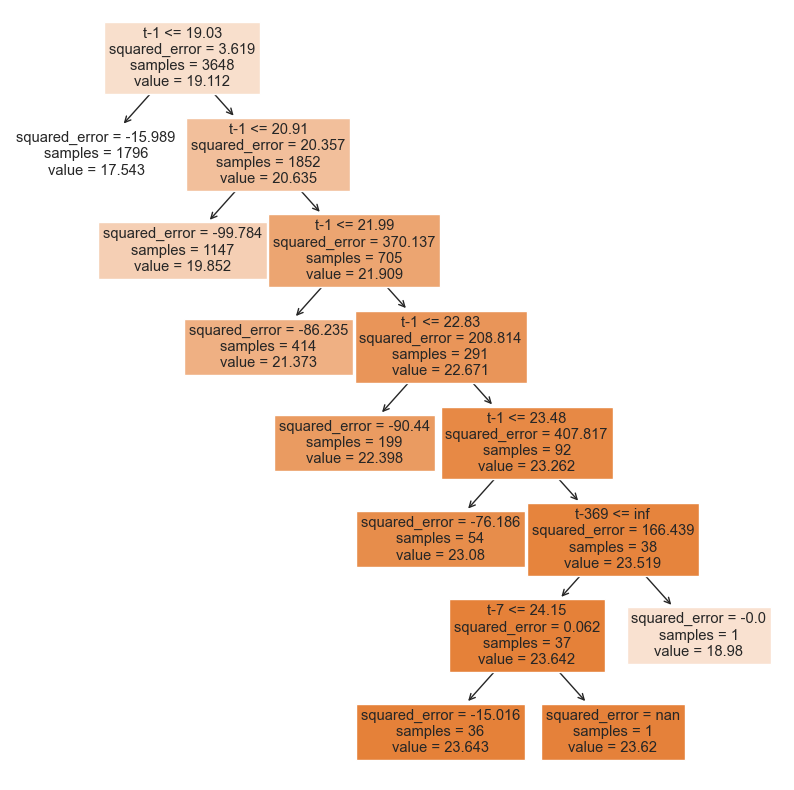

In [ ]:
# Configurar y mostrar el gráfico del árbol de decisión
plt.figure(figsize=(10, 10))
_ = tree.plot_tree(AperturaDT3, 
                   feature_names=listacaract,  
                   filled=True)

# Mostrar el gráfico
plt.show()

In [ ]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

2622
2622
656
656


In [ ]:
indicetrian_val_test=df1.index
print(indicetrian_val_test.size)
indicetrain_val=indicetrian_val_test[0:2622]
indicetest=indicetrian_val_test[2622:3648]

3648


In [ ]:
print(indicetrain_val.size)
print(indicetest.size)

2622
1026


In [ ]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

3278
3278


In [ ]:
# Recortar el índice para que coincida con la longitud de los datos
indicetrian_val_test_recortado = indicetrian_val_test[:3278]

# Crear el DataFrame utilizando los datos y el índice recortados
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred = pd.DataFrame(data=d, index=indicetrian_val_test_recortado)

# Mostrar el DataFrame resultante
ObsvsPred.head(10)

observado  Predicción
Fecha                            
2010-01-04      19.36   19.261558
2010-01-05      19.36   19.261558
2010-01-06      19.26   19.261558
2010-01-07      19.50   19.261558
2010-01-08      19.58   19.462609
2010-01-09      20.62   19.703429
2010-01-10      20.62   20.585161
2010-01-11      20.62   20.585161
2010-01-12      20.50   20.585161
2010-01-13      20.46   20.585161

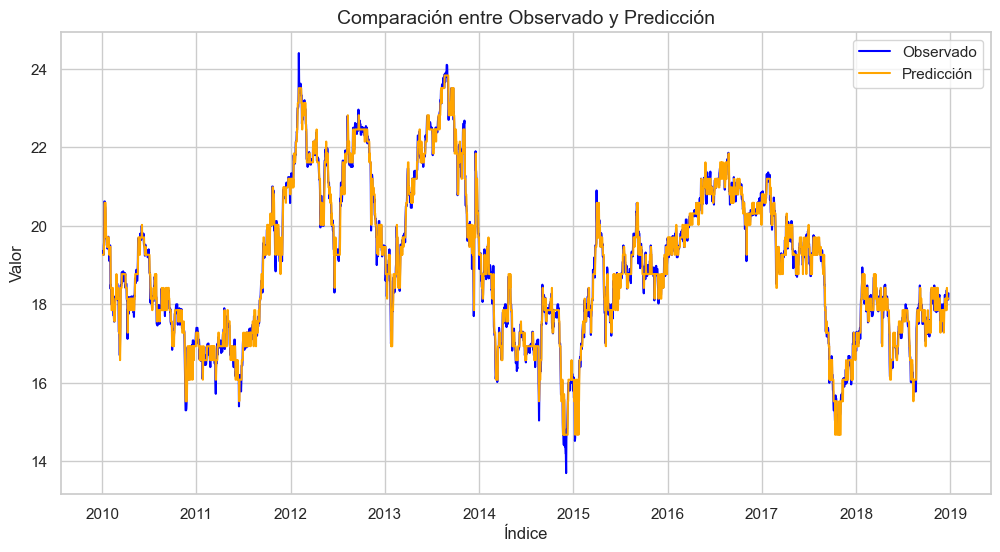

In [ ]:
import matplotlib.pyplot as plt

# Configuración de la figura y estilo de línea
plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Gráfico de líneas para las columnas 'observado' y 'Predicción'
plt.plot(ObsvsPred['observado'], label='Observado', color='blue', linestyle='-')
plt.plot(ObsvsPred['Predicción'], label='Predicción', color='orange', linestyle='-')

# Agregar título y etiquetas de los ejes
plt.title('Comparación entre Observado y Predicción', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


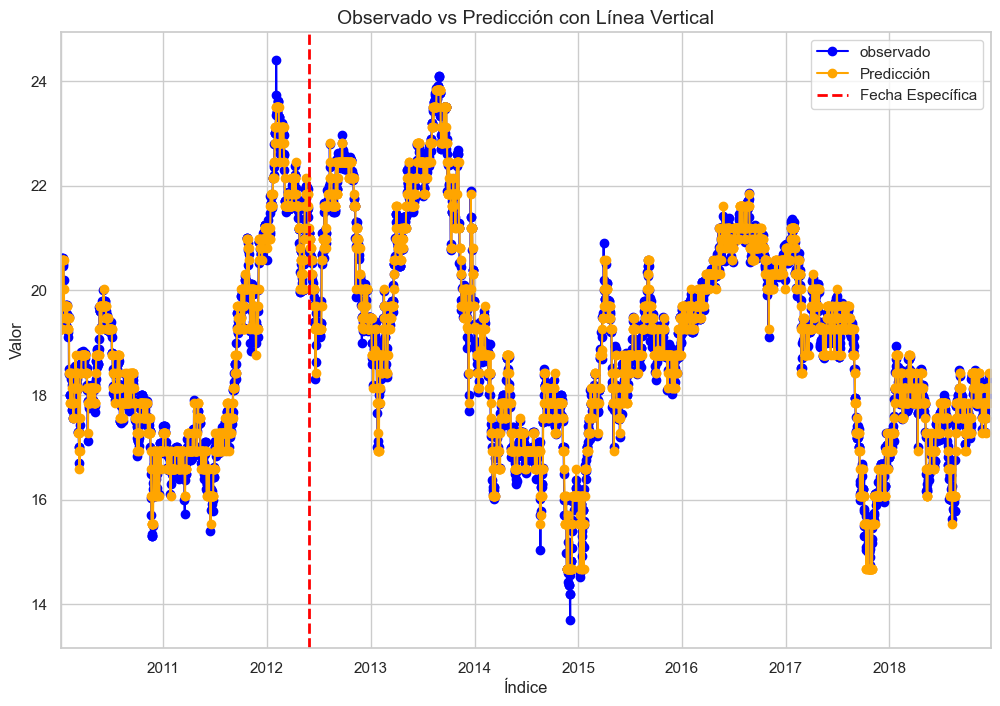

In [ ]:
import matplotlib.pyplot as plt

# Configuración del gráfico utilizando Pandas plot y Matplotlib
ax = ObsvsPred.plot(marker="o", figsize=(12, 8), color=['blue', 'orange'])  # Cambiar colores de 'observado' y 'predicción'

# Añadir línea vertical en una fecha específica
fecha_vertical = indicetrian_val_test[876].date()  # Fecha específica para la línea vertical
ax.axvline(x=fecha_vertical, color='red', linestyle='--', linewidth=2, label='Fecha Específica')

# Ajustar etiquetas y título del gráfico
plt.title('Observado vs Predicción con Línea Vertical', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir leyenda al gráfico
plt.legend()

# Mostrar el gráfico
plt.show()

<center><h1 style="color: #011f4b;">REDES NEURONALES APLICADAS A SERIES DE TIEMPO</h1></center>

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>